In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
%matplotlib inline

In [3]:
train = pd.read_csv('training/training.csv')
test = pd.read_csv('test/test.csv')

In [4]:
train.head()

,left_eye_center_x,left_eye_center_y,right_eye_center_x,right_eye_center_y,left_eye_inner_corner_x,left_eye_inner_corner_y,left_eye_outer_corner_x,left_eye_outer_corner_y,right_eye_inner_corner_x,right_eye_inner_corner_y,...,nose_tip_y,mouth_left_corner_x,mouth_left_corner_y,mouth_right_corner_x,mouth_right_corner_y,mouth_center_top_lip_x,mouth_center_top_lip_y,mouth_center_bottom_lip_x,mouth_center_bottom_lip_y,Image
0,66.033564,39.002274,30.227008,36.421678,59.582075,39.647423,73.130346,39.969997,36.356571,37.389402,...,57.066803,61.195308,79.970165,28.614496,77.388992,43.312602,72.935459,43.130707,84.485774,238 236 237 238 240 240 239 241 241 243 240 23...
1,64.332936,34.970077,29.949277,33.448715,58.856170,35.274349,70.722723,36.187166,36.034723,34.361532,...,55.660936,56.421447,76.352000,35.122383,76.047660,46.684596,70.266553,45.467915,85.480170,219 215 204 196 204 211 212 200 180 168 178 19...
2,65.057053,34.909642,30.903789,34.909642,59.412000,36.320968,70.984421,36.320968,37.678105,36.320968,...,53.538947,60.822947,73.014316,33.726316,72.732000,47.274947,70.191789,47.274947,78.659368,144 142 159 180 188 188 184 180 167 132 84 59 ...
3,65.225739,37.261774,32.023096,37.261774,60.003339,39.127179,72.314713,38.380967,37.618643,38.754115,...,54.166539,65.598887,72.703722,37.245496,74.195478,50.303165,70.091687,51.561183,78.268383,193 192 193 194 194 194 193 192 168 111 50 12 ...
4,66.725301,39.621261,32.244810,38.042032,58.565890,39.621261,72.515926,39.884466,36.982380,39.094852,...,64.889521,60.671411,77.523239,31.191755,76.997301,44.962748,73.707387,44.227141,86.871166,147 148 160 196 215 214 216 217 219 220 206 18...


In [5]:
train.shape

(7049, 31)

In [6]:
test.shape

(1783, 2)

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7049 entries, 0 to 7048
Data columns (total 31 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   left_eye_center_x          7039 non-null   float64
 1   left_eye_center_y          7039 non-null   float64
 2   right_eye_center_x         7036 non-null   float64
 3   right_eye_center_y         7036 non-null   float64
 4   left_eye_inner_corner_x    2271 non-null   float64
 5   left_eye_inner_corner_y    2271 non-null   float64
 6   left_eye_outer_corner_x    2267 non-null   float64
 7   left_eye_outer_corner_y    2267 non-null   float64
 8   right_eye_inner_corner_x   2268 non-null   float64
 9   right_eye_inner_corner_y   2268 non-null   float64
 10  right_eye_outer_corner_x   2268 non-null   float64
 11  right_eye_outer_corner_y   2268 non-null   float64
 12  left_eyebrow_inner_end_x   2270 non-null   float64
 13  left_eyebrow_inner_end_y   2270 non-null   float

In [8]:
train.isna().sum()

left_eye_center_x              10
left_eye_center_y              10
right_eye_center_x             13
right_eye_center_y             13
left_eye_inner_corner_x      4778
left_eye_inner_corner_y      4778
left_eye_outer_corner_x      4782
left_eye_outer_corner_y      4782
right_eye_inner_corner_x     4781
right_eye_inner_corner_y     4781
right_eye_outer_corner_x     4781
right_eye_outer_corner_y     4781
left_eyebrow_inner_end_x     4779
left_eyebrow_inner_end_y     4779
left_eyebrow_outer_end_x     4824
left_eyebrow_outer_end_y     4824
right_eyebrow_inner_end_x    4779
right_eyebrow_inner_end_y    4779
right_eyebrow_outer_end_x    4813
right_eyebrow_outer_end_y    4813
nose_tip_x                      0
nose_tip_y                      0
mouth_left_corner_x          4780
mouth_left_corner_y          4780
mouth_right_corner_x         4779
mouth_right_corner_y         4779
mouth_center_top_lip_x       4774
mouth_center_top_lip_y       4774
mouth_center_bottom_lip_x      33
mouth_center_b

In [9]:
train[train['left_eye_center_x'].isna()].index.tolist()

[1687, 1834, 1866, 1938, 2100, 2137, 2153, 2175, 2186, 2239]

In [10]:
train[1686 : 1689]

,left_eye_center_x,left_eye_center_y,right_eye_center_x,right_eye_center_y,left_eye_inner_corner_x,left_eye_inner_corner_y,left_eye_outer_corner_x,left_eye_outer_corner_y,right_eye_inner_corner_x,right_eye_inner_corner_y,...,nose_tip_y,mouth_left_corner_x,mouth_left_corner_y,mouth_right_corner_x,mouth_right_corner_y,mouth_center_top_lip_x,mouth_center_top_lip_y,mouth_center_bottom_lip_x,mouth_center_bottom_lip_y,Image
1686,65.122098,36.396540,31.040735,37.985295,57.537073,37.395918,71.842020,38.418872,38.472010,38.907798,...,52.824165,65.167833,75.855061,37.012677,77.215894,53.506906,72.030653,52.357237,76.817029,44 41 44 33 21 17 18 18 21 24 23 26 25 26 21 1...
1687,NaN,NaN,NaN,NaN,57.931068,40.808627,73.232712,44.910035,NaN,NaN,...,55.500993,54.595918,74.511943,24.118659,68.652754,39.136317,71.487238,37.405514,75.520178,53 55 55 56 57 58 60 62 63 64 65 66 69 71 72 6...
1688,64.732263,38.099388,29.076790,38.230185,57.852300,39.485844,74.175863,38.622579,40.299239,40.113673,...,59.577922,63.814675,74.988312,32.466623,75.666234,51.074415,77.746753,51.167922,78.611688,89 55 56 71 90 75 98 122 123 111 75 87 86 90 8...


In [11]:
train_ffill = train.fillna(method='ffill')

In [12]:
train_ffill[1686 : 1689]

,left_eye_center_x,left_eye_center_y,right_eye_center_x,right_eye_center_y,left_eye_inner_corner_x,left_eye_inner_corner_y,left_eye_outer_corner_x,left_eye_outer_corner_y,right_eye_inner_corner_x,right_eye_inner_corner_y,...,nose_tip_y,mouth_left_corner_x,mouth_left_corner_y,mouth_right_corner_x,mouth_right_corner_y,mouth_center_top_lip_x,mouth_center_top_lip_y,mouth_center_bottom_lip_x,mouth_center_bottom_lip_y,Image
1686,65.122098,36.396540,31.040735,37.985295,57.537073,37.395918,71.842020,38.418872,38.472010,38.907798,...,52.824165,65.167833,75.855061,37.012677,77.215894,53.506906,72.030653,52.357237,76.817029,44 41 44 33 21 17 18 18 21 24 23 26 25 26 21 1...
1687,65.122098,36.396540,31.040735,37.985295,57.931068,40.808627,73.232712,44.910035,38.472010,38.907798,...,55.500993,54.595918,74.511943,24.118659,68.652754,39.136317,71.487238,37.405514,75.520178,53 55 55 56 57 58 60 62 63 64 65 66 69 71 72 6...
1688,64.732263,38.099388,29.076790,38.230185,57.852300,39.485844,74.175863,38.622579,40.299239,40.113673,...,59.577922,63.814675,74.988312,32.466623,75.666234,51.074415,77.746753,51.167922,78.611688,89 55 56 71 90 75 98 122 123 111 75 87 86 90 8...


In [13]:
train_bfill = train.fillna(method='bfill')
train_bfill[1686 : 1689]

,left_eye_center_x,left_eye_center_y,right_eye_center_x,right_eye_center_y,left_eye_inner_corner_x,left_eye_inner_corner_y,left_eye_outer_corner_x,left_eye_outer_corner_y,right_eye_inner_corner_x,right_eye_inner_corner_y,...,nose_tip_y,mouth_left_corner_x,mouth_left_corner_y,mouth_right_corner_x,mouth_right_corner_y,mouth_center_top_lip_x,mouth_center_top_lip_y,mouth_center_bottom_lip_x,mouth_center_bottom_lip_y,Image
1686,65.122098,36.396540,31.040735,37.985295,57.537073,37.395918,71.842020,38.418872,38.472010,38.907798,...,52.824165,65.167833,75.855061,37.012677,77.215894,53.506906,72.030653,52.357237,76.817029,44 41 44 33 21 17 18 18 21 24 23 26 25 26 21 1...
1687,64.732263,38.099388,29.076790,38.230185,57.931068,40.808627,73.232712,44.910035,40.299239,40.113673,...,55.500993,54.595918,74.511943,24.118659,68.652754,39.136317,71.487238,37.405514,75.520178,53 55 55 56 57 58 60 62 63 64 65 66 69 71 72 6...
1688,64.732263,38.099388,29.076790,38.230185,57.852300,39.485844,74.175863,38.622579,40.299239,40.113673,...,59.577922,63.814675,74.988312,32.466623,75.666234,51.074415,77.746753,51.167922,78.611688,89 55 56 71 90 75 98 122 123 111 75 87 86 90 8...


In [14]:
train.fillna(method='ffill', inplace=True)

In [15]:
train.isna().sum()

left_eye_center_x            0
left_eye_center_y            0
right_eye_center_x           0
right_eye_center_y           0
left_eye_inner_corner_x      0
left_eye_inner_corner_y      0
left_eye_outer_corner_x      0
left_eye_outer_corner_y      0
right_eye_inner_corner_x     0
right_eye_inner_corner_y     0
right_eye_outer_corner_x     0
right_eye_outer_corner_y     0
left_eyebrow_inner_end_x     0
left_eyebrow_inner_end_y     0
left_eyebrow_outer_end_x     0
left_eyebrow_outer_end_y     0
right_eyebrow_inner_end_x    0
right_eyebrow_inner_end_y    0
right_eyebrow_outer_end_x    0
right_eyebrow_outer_end_y    0
nose_tip_x                   0
nose_tip_y                   0
mouth_left_corner_x          0
mouth_left_corner_y          0
mouth_right_corner_x         0
mouth_right_corner_y         0
mouth_center_top_lip_x       0
mouth_center_top_lip_y       0
mouth_center_bottom_lip_x    0
mouth_center_bottom_lip_y    0
Image                        0
dtype: int64

In [16]:
image_df = train['Image']
image_arr = [] 

for i in range(0, len(image_df)) :
    img = image_df[i].split()
    img = ['0' if x == ' ' else x for x in img]
    image_arr.append(img)

In [17]:
len(image_df[10].split())

9216

In [18]:
x_train = np.array(image_arr, dtype = 'float')

In [19]:
x_train.shape

(7049, 9216)

In [20]:
x_train = x_train.reshape(x_train.shape[0], 96,96,1)

In [21]:
x_train.shape

(7049, 96, 96, 1)

In [22]:
keypoints_df = train.drop(['Image'], axis = 1)
y_train = np.array(keypoints_df, dtype = 'float')
y_train.shape

(7049, 30)

In [23]:
def visualizeWithNoKeypoints(index):
    plt.imshow(x_train[index].reshape(96,96),cmap='gray')
    
def visualizeWithKeypoints(index) :
    plt.imshow(x_train[index].reshape(96,96),cmap='gray')
    for i in range(1,31,2) :
        plt.plot(y_train[0][i-1],y_train[0][i], 'ro')

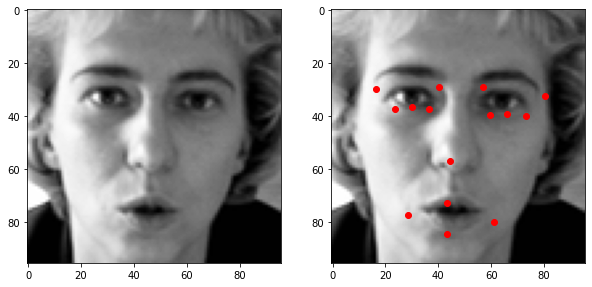

In [24]:
plt.figure(figsize= [10,8])
plt.subplot(1,2,1)
visualizeWithNoKeypoints(1)
plt.subplot(1,2,2)
visualizeWithKeypoints(1)

In [25]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, BatchNormalization, MaxPool2D, LeakyReLU

In [26]:
model = Sequential()
model.add(Conv2D(filters = 32, kernel_size = (3,3), padding = 'same', input_shape =( 96, 96, 1)))
model.add(LeakyReLU(alpha= 0.01))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size = (2,2)))

model.add(Conv2D(filters = 64, kernel_size = (3,3), padding = 'same'))
model.add(LeakyReLU(alpha= 0.01))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size= (2,2)))

model.add(Conv2D(filters = 96, kernel_size = (3,3), padding= 'same'))
model.add(LeakyReLU(alpha= 0.01))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters= 128, kernel_size= (3,3), padding = 'same'))
model.add(LeakyReLU(alpha= 0.01))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size= (2,2)))

model.add(Conv2D(filters = 256, kernel_size=(3,3), padding= 'same'))
model.add(LeakyReLU(alpha= 0.01))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size= (2,2)))

model.add(Conv2D(filters = 512, kernel_size=(3,3), padding= 'same'))
model.add(LeakyReLU(alpha= 0.01))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size= (2,2)))

model.add(Flatten())

model.add(Dense(units= 256, activation='relu'))
model.add(Dense(units= 64, activation='relu'))
model.add(Dense(units=30))


In [27]:
model.compile(optimizer= tf.optimizers.Adam(lr = 0.01), loss=tf.losses.mean_squared_error, metrics= ['mae','acc'])

In [28]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 96, 96, 32)        320       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 96, 96, 32)        0         
                                                                 
 batch_normalization (BatchN  (None, 96, 96, 32)       128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 48, 48, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 48, 48, 64)        18496     
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 48, 48, 64)        0

In [60]:
result = model.fit(x_train, y_train, epochs=50, shuffle=True, batch_size = 64, validation_split=0.02)

Epoch 1/50
108/108 [==============================] - 91s 838ms/step - loss: 7.8261 - mae: 1.8437 - acc: 0.7374 - val_loss: 6.9923 - val_mae: 1.9307 - val_acc: 0.6383
Epoch 2/50
108/108 [==============================] - 80s 736ms/step - loss: 7.4391 - mae: 1.7992 - acc: 0.7452 - val_loss: 6.4733 - val_mae: 1.6819 - val_acc: 0.6525
Epoch 3/50
108/108 [==============================] - 79s 732ms/step - loss: 7.2658 - mae: 1.7896 - acc: 0.7491 - val_loss: 4.4243 - val_mae: 1.4079 - val_acc: 0.6241
Epoch 4/50
108/108 [==============================] - 79s 729ms/step - loss: 6.6132 - mae: 1.6934 - acc: 0.7590 - val_loss: 6.1554 - val_mae: 1.7784 - val_acc: 0.6525
Epoch 5/50
108/108 [==============================] - 79s 727ms/step - loss: 5.9655 - mae: 1.5790 - acc: 0.7714 - val_loss: 4.7208 - val_mae: 1.5565 - val_acc: 0.6596
Epoch 6/50
108/108 [==============================] - 79s 730ms/step - loss: 6.2198 - mae: 1.6714 - acc: 0.7774 - val_loss: 3.7864 - val_mae: 1.3990 - val_acc: 0.744

Epoch 50/50
108/108 [==============================] - 79s 732ms/step - loss: 1.4394 - mae: 0.8076 - acc: 0.8901 - val_loss: 2.5320 - val_mae: 0.9357 - val_acc: 0.7660


In [61]:
result.history.keys()

dict_keys(['loss', 'mae', 'acc', 'val_loss', 'val_mae', 'val_acc'])

In [62]:
test.head()

,ImageId,Image
0,1,182 183 182 182 180 180 176 169 156 137 124 10...
1,2,76 87 81 72 65 59 64 76 69 42 31 38 49 58 58 4...
2,3,177 176 174 170 169 169 168 166 166 166 161 14...
3,4,176 174 174 175 174 174 176 176 175 171 165 15...
4,5,50 47 44 101 144 149 120 58 48 42 35 35 37 39 ...


In [63]:
test_image_df = test['Image']
test_img_arr = []

for i in range(0, len(test_image_df)) :
    t_img = test_image_df[i].split()
    t_img = ['0' if x == ' ' else x for x in t_img]
    test_img_arr.append(t_img)
    

In [64]:
x_test = np.array(test_img_arr, 'float')
x_test = x_test.reshape(x_test.shape[0], 96,96, 1)

In [65]:
x_test.shape

(1783, 96, 96, 1)

In [66]:
y_pred = model.predict(x_test)

In [67]:
y_pred

array([[66.2075  , 37.104774, 29.189632, ..., 69.09113 , 47.496853,
        84.60185 ],
       [67.81605 , 35.833893, 27.231586, ..., 72.80889 , 50.322083,
        86.71186 ],
       [66.35842 , 35.622623, 31.440899, ..., 71.040634, 50.708683,
        82.32417 ],
       ...,
       [66.46635 , 42.75393 , 32.315826, ..., 75.584915, 45.842888,
        79.0363  ],
       [64.83732 , 38.401615, 30.887112, ..., 75.72152 , 46.797474,
        71.72842 ],
       [68.39962 , 39.355274, 29.723469, ..., 75.07669 , 46.764618,
        78.72032 ]], dtype=float32)

In [68]:
def testValueWithNoKeypoints(pt) :
    plt.imshow(x_test[pt].reshape(96,96) , cmap = 'gray')

In [69]:
def testValueWithKeypoints(pt) :
    plt.imshow(x_test[pt].reshape(96,96), cmap = 'gray')
    for i in range(1,31,2) :
        plt.plot(y_pred[0][i-1], y_pred[0][i], 'ro')

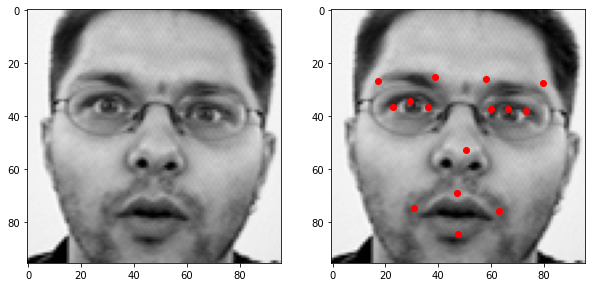

In [70]:
plt.figure(figsize = [10,8])
plt.subplot(1,2,1)
testValueWithNoKeypoints(10)
plt.subplot(1,2,2)
testValueWithKeypoints(10)

In [71]:
test_val = pd.read_csv('SampleSubmission.csv')

In [72]:
test_val.columns

Index(['RowId', 'Location'], dtype='object')

In [73]:
predData = pd.DataFrame(y_pred)
Dataset = pd.concat([test_val['RowId'], predData], axis=1)

In [74]:
Dataset.head()

,RowId,0,1,2,3,4,5,6,7,8,...,20,21,22,23,24,25,26,27,28,29
0,1,66.207497,37.104774,29.189632,34.161564,59.830112,37.143372,72.999817,38.066380,36.030361,...,50.433868,52.983547,62.791122,75.812950,30.939583,74.925156,46.909428,69.091133,47.496853,84.601852
1,2,67.816048,35.833893,27.231586,36.478336,60.393116,37.536160,74.254417,36.715858,34.555374,...,50.124474,59.318840,65.544006,75.250168,33.082664,77.197304,49.102501,72.808891,50.322083,86.711861
2,3,66.358421,35.622623,31.440899,36.719769,59.680840,37.906185,71.506668,37.076237,37.748425,...,49.832497,56.062302,63.977802,74.595833,36.766468,76.092155,50.396530,71.040634,50.708683,82.324173
3,4,66.203583,39.499523,30.211430,39.023472,58.606236,40.921516,71.557480,40.980022,35.912758,...,46.995071,52.217026,63.162460,78.633728,33.254013,79.462593,47.167606,72.632339,48.143787,83.226151
4,5,67.950783,36.277683,26.687737,37.459053,61.046326,37.571083,73.448723,37.431614,34.052555,...,49.549484,53.514938,64.934067,76.045517,35.706432,77.597763,50.035057,70.643089,50.475735,85.334389


In [75]:
idtable=pd.read_csv('IdLookupTable.csv')
rowId=list(idtable['RowId'])
imageId=list(idtable['ImageId'])

In [76]:
featureHead=list(train.columns.values)
featureIndex=[featureHead.index(feature) for feature in idtable['FeatureName']]

In [77]:
loc=[]
for index,imgId in zip(featureIndex,imageId):
    loc.append(y_pred[imgId-1][index])

In [78]:
subm = pd.DataFrame({'RowId':rowId,'Location':loc})
subm.head()

,RowId,Location
0,1,66.207497
1,2,37.104774
2,3,29.189632
3,4,34.161564
4,5,59.830112


In [79]:
subm.to_csv('SampleSubmission02.csv', index=False)